# <center> Introduction to Reinforcement Learning</center>

# Coding Exercise (6 pts) - Implement Value Iteration

#### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pickle

import sys
import os

from Practical07_Support.gym_simple_gridworlds.helper import *
from Practical07_Support.gym_simple_gridworlds.envs.grid_env import GridEnv
from Practical07_Support.gym_simple_gridworlds.envs.grid_2dplot import *


from IPython.display import display, HTML

During the lecture you implemented policy iteration for finding the optimal policy. 

In this exercise, you are tasked with implementing the value iteration algorithm shown below:
    
![ValueIteration.png](https://i.postimg.cc/RFg5zYr0/Value-Iteration.png)

Please keep in mind:
- **TODO 1**: Use the helper method ``one_step_look_ahead(.)`` in ``Support/gym_simple_gridworlds/helper.py`` to update of your current $v(s)$ according to:
$v(s) \leftarrow \max_{a \in \mathcal{A}} \Bigl(\mathcal{R}(s,a) + \gamma\sum_{s' \in \mathcal{S}}\mathcal{T}(s,a,s')v(s')\Bigr)$
- **TODO 2**: Use the helper method ``update_policy(.)`` in ``Support/gym_simple_gridworlds/helper.py`` to obtain the deterministic optimal policy $\pi^*$ associated to your $v^*(s)$ estimate

In [2]:
def value_iteration(grid_env, threshold=0.00001, plot=False):
    """
    This function iteratively computes optimal state-value function for a given environment grid_env. 
    It returns the optimal state-value function and its associated optimal policy
    
    :param grid_env (GridEnv): MDP environment
    :param threshoold (float): Convergence threshold
    :param plot (bool): Bool argument indicating if value function and policy should be displayed 
    :return: (tuple) Optimal state-value funciton (dict) and deterministic optimal policy (matrix)
    """
    
    #1. Get list of states in environment
    states = grid_env.get_states()
    
    #2. Initialize v function
    v = {s: 0.0 for s in grid_env.get_states()}
    
    #3. Set convergence threshold and error variable
    theta = threshold
    delta = 1000
    
    #4. Update v(s) until convergence
    while delta > theta:
        #TODO 1: Use the helper method one_step_look_ahead(.) to update of your current v(s) ------
        delta = 0

        for (s, V) in v.items():
            v[s] = np.max(one_step_look_ahead(grid_env, s, v)).item()
            delta = max(delta, abs(V - v[s]))
        #ENDTODO ----------------------------------------------------------------------------------
            
    #5. Compute deterministic policy given v(s)
    temp_policy = np.ones(grid_env.grid.shape) * -1
    
    #TODO 2: Use the helper method update_policy(.) to obtain the deterministic optimal policy ----
    optimal_policy = update_policy(grid_env, temp_policy, v)
    #ENDTODO --------------------------------------------------------------------------------------
    
    
    if plot:
        plot_value_function(grid_env, v)
        plot_policy(grid_env, optimal_policy)
        
    return v, optimal_policy    

### Test your implementation

Given an grid world environment with the following attributes:
- Discount factor $\gamma = 0.9$ (class attribute ``gamma=0.9``)
- Stochastic transition matrix (class attribute ``noise=0.2``)
- Rewards are only obtained at terminal states (class attribute ``living_reward=0.0``)

Note: when grading several test cases with different grid world atrributes will be used

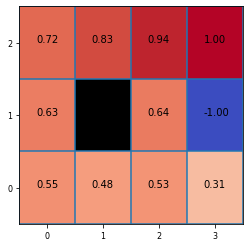

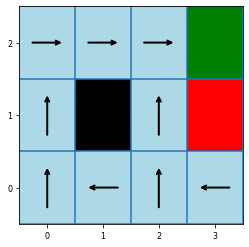

In [3]:
# Create a grid world mdp
grid_world = GridEnv(gamma=0.9, noise=0.2, living_reward=0)

optimal_state_function, optimal_policy = value_iteration(grid_world, plot=True)

Compare your state-value function and optimal policy to the values provided in the test file ``Support/data/ValueIteration_TestCase.pk``:

(<Figure size 288x288 with 1 Axes>, <AxesSubplot:>)

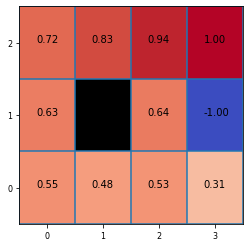

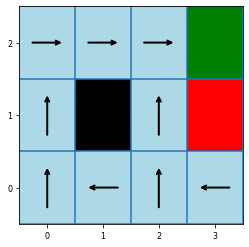

In [4]:
import pickle

ckp_test= 'Practical07_Support/pickle/ValueIteration_TestCase.pk'

with open(ckp_test, 'rb') as read_from:
    test_values = pickle.load(read_from)
 
test_v = test_values['value_state_function']
test_p = test_values['optimal_policy']

plot_value_function(grid_world, test_v)
plot_policy(grid_world, test_p)

# Grading

Expected return:
- Your implementation should return the state-value function (in python dictionary) and the optimal policy (matrix form)

For grading:
- You will be graded based on the output of the ``value_iteration(.)`` method. Please make sure that your solution returns the expected variables with the correct type (no rounding is needed)

In [5]:
import otter
grader = otter.Notebook(tests_dir = "Practical07_Support/tests")
grader.check_all()

/usr/local/lib/python3.8/dist-packages/IPython/core/inputsplitter.py:21: DeprecationWarning: IPython.core.inputsplitter is deprecated since IPython 7 in favor of `IPython.core.inputtransformer2`
  warn('IPython.core.inputsplitter is deprecated since IPython 7 in favor of `IPython.core.inputtransformer2`',


policy results: All test cases passed!
policy - 1 message: Policy: You have more than 3 square correct in 3 different scenarios
policy - 2 message: Policy: You have more than 8 square correct in 3 different scenarios
policy - 3 message: Policy: All your squares are correct in 3 different scenarios

value results: All test cases passed!
value - 1 message: Value Function: You have more than 3 square correct in 3 different scenarios
value - 2 message: Value Function: You have more than 7 square correct in 3 different scenarios
value - 3 message: Value Function: All your squares are correct in 3 different scenarios